<a href="https://colab.research.google.com/github/Sompote/RIC_predict/blob/main/RIC_combind_3model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the model for predicing RIC compaciton composed of the base model, simple feed forewrad ANN. THe feature was concacate to the time s.eries model

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd



df = pd.read_excel('/content/drive/MyDrive/RIC/Trial2R1.xlsx')
data=np.array(df)
X=data[:,1:18]
Y=data[:,20:34]


This is base model on simple ANN with feature concate to the time series data.

Epoch 1/1000
2/2 [==============================] - 2s 647ms/step - loss: 1.4499 - mape: 212.2273 - val_loss: 1.1922 - val_mape: 469.0770
Epoch 2/1000
2/2 [==============================] - 0s 107ms/step - loss: 1.2829 - mape: 177.4010 - val_loss: 1.1205 - val_mape: 449.5031
Epoch 3/1000
2/2 [==============================] - 0s 34ms/step - loss: 1.1681 - mape: 153.9010 - val_loss: 1.0805 - val_mape: 428.0357
Epoch 4/1000
2/2 [==============================] - 0s 38ms/step - loss: 1.0973 - mape: 134.8139 - val_loss: 1.0663 - val_mape: 406.0686
Epoch 5/1000
2/2 [==============================] - 0s 51ms/step - loss: 1.0455 - mape: 121.2886 - val_loss: 1.0679 - val_mape: 387.7910
Epoch 6/1000
2/2 [==============================] - 0s 33ms/step - loss: 1.0188 - mape: 111.0215 - val_loss: 1.0768 - val_mape: 375.5602
Epoch 7/1000
2/2 [==============================] - 0s 43ms/step - loss: 0.9991 - mape: 109.1308 - val_loss: 1.0813 - val_mape: 359.4099
Epoch 8/1000
2/2 [=====================

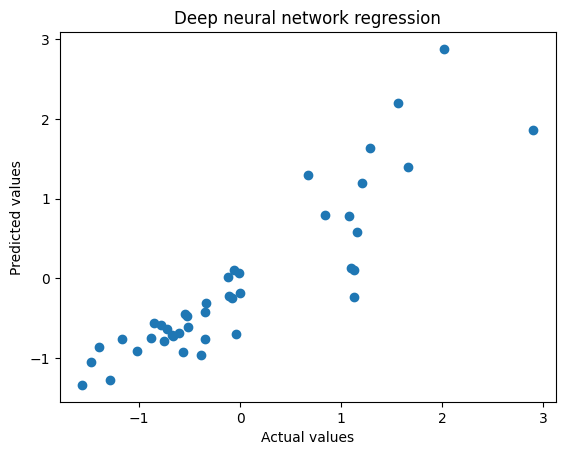

In [12]:
# Load and preprocess data
#base model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)
sc = StandardScaler()
sc_y=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_train=sc_y.fit_transform(y_train)
y_test=sc_y.transform(y_test)

# Define neural network model
model = Sequential()
model.add(Dense(100, activation='sigmoid', input_dim=X_train.shape[1]))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(20, activation='linear'))


model.add(Dense(y_train.shape[1]))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mape'])

# Train model
history = model.fit(X_train, y_train, batch_size=20, epochs=1000, validation_data=(X_test, y_test))

# Evaluate model
y_pred = model.predict(X_test)
mse = model.evaluate(X_test, y_test)
print("Mean squared error:", mse)

'''def mape(actual, pred):
  return np.mean(np.abs((actual - pred) / actual)) * 100
mape_cal=mape(y_test, y_pred)
print('mape =',mape_cal)'''

# Plot results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Deep neural network regression")
plt.show()

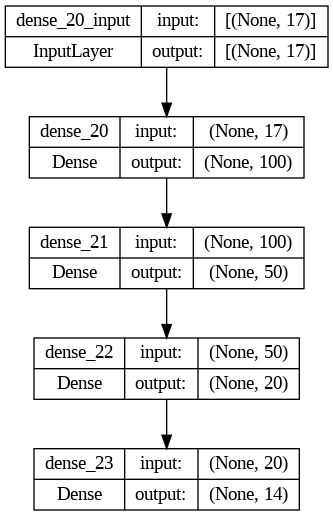

In [13]:
# plot and save your model
import tensorflow as tf
img_file = 'model.png'
tf.keras.utils.plot_model(model, to_file=img_file, show_shapes=True, show_layer_names=True)

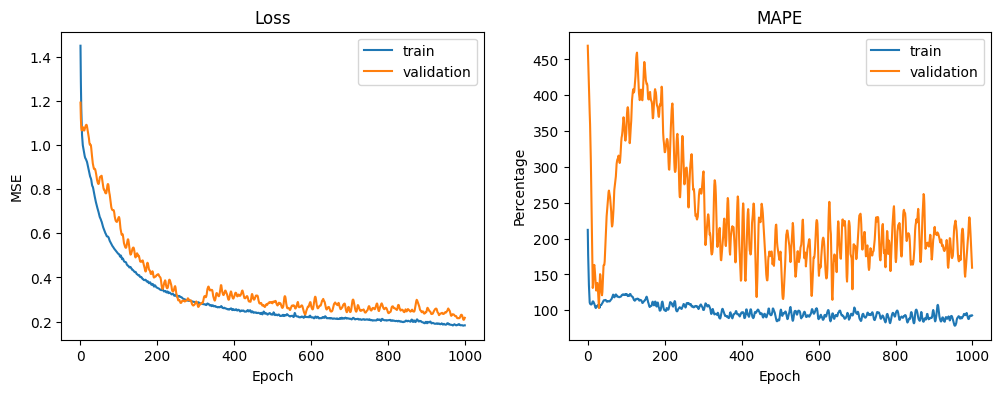

In [14]:

# plot the loss and mape for train and validation sets
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mape'], label='train')
plt.plot(history.history['val_mape'], label='validation')
plt.title('MAPE')
plt.xlabel('Epoch')
plt.ylabel('Percentage')
plt.legend()

plt.show()

This part try to predict the RIC fro the sample initial value of Qc

1/1 [==============================] - 0s 32ms/step
[[11.823025  31.64523   28.093634  29.190836  27.75987    5.76231
   6.1467433  8.333649   2.3589973 -4.9351034 -2.2186232  2.007172
   0.9232066  3.9655998]]


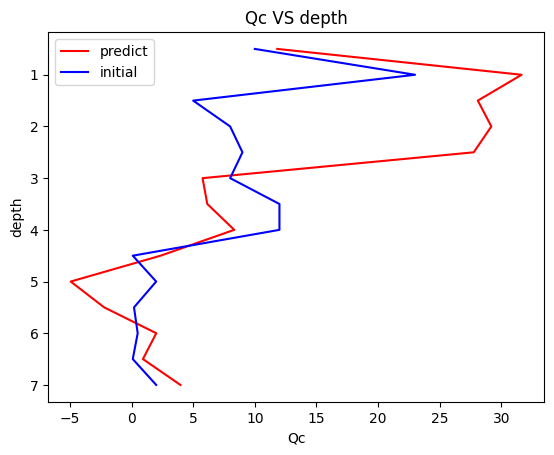

In [30]:
#validation for prediction
x_predictn=np.zeros((1,17))
x_predictn[0,:]=[10,23,5,8,9,8,12,12,0.1,2,0.2,0.5,0.1,2,50,18,0.5]
X_predict = sc.transform(x_predictn)

#set up calculation matrix

y=model.predict(X_predict)
y=sc_y.inverse_transform(y)
print(y)
#plot

import matplotlib.pyplot as plt

# Define the x-axis and corresponding y-axis values as lists

ydist=[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7]


# Plot them on canvas using plt.plot() function
plt.plot(y[0,:], ydist,color='red',label='predict')
plt.plot(x_predictn[0,0:14], ydist,color='blue',label='initial')
plt.legend()


# Give a name to x-axis and y-axis using plt.xlabel() and plt.ylabel() functions
plt.xlabel("Qc")
plt.ylabel("depth")

# Give a title to your plot using plt.title() function
plt.title("Qc VS depth")
# Get the current axes instance
ax = plt.gca()

# Invert the y-axis
ax.invert_yaxis()

# Finally, to view your plot, we use plt.show() function
plt.show()

Epoch 1/1000
2/2 [==============================] - 3s 210ms/step - loss: 1.4799 - mape: 301.6076 - val_loss: 1.4987 - val_mape: 303.8247
Epoch 2/1000
2/2 [==============================] - 0s 55ms/step - loss: 1.4607 - mape: 280.3679 - val_loss: 1.1253 - val_mape: 155.5925
Epoch 3/1000
2/2 [==============================] - 0s 59ms/step - loss: 1.1329 - mape: 164.7435 - val_loss: 1.2187 - val_mape: 216.1325
Epoch 4/1000
2/2 [==============================] - 0s 57ms/step - loss: 1.2462 - mape: 216.4891 - val_loss: 1.2407 - val_mape: 184.0450
Epoch 5/1000
2/2 [==============================] - 0s 43ms/step - loss: 1.1989 - mape: 177.1741 - val_loss: 1.0561 - val_mape: 138.6874
Epoch 6/1000
2/2 [==============================] - 0s 47ms/step - loss: 1.1038 - mape: 142.9238 - val_loss: 1.1814 - val_mape: 148.6531
Epoch 7/1000
2/2 [==============================] - 0s 58ms/step - loss: 1.1732 - mape: 148.6977 - val_loss: 1.1356 - val_mape: 174.9650
Epoch 8/1000
2/2 [======================

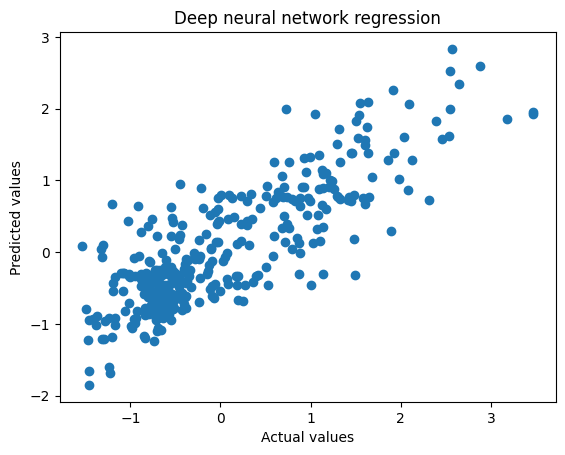

In [34]:
 #Load and preprocess data
 #train all data
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)
X_train=X
Y_train=Y
sc = StandardScaler()
sc_y=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = X_train
y_train=sc_y.fit_transform(Y_train)
y_test=y_train

# Define neural network model
model = Sequential()
model.add(Dense(500, activation='sigmoid', input_dim=X_train.shape[1]))
model.add(Dense(300, activation='sigmoid'))
model.add(Dense(40, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(40, activation='sigmoid'))
model.add(Dense(300, activation='sigmoid'))
model.add(Dense(500, activation='linear'))


model.add(Dense(y_train.shape[1]))

# Compile model
model.compile(optimizer='adam', loss='mse',metrics=['mape'])

# Train model
history = model.fit(X_train, y_train, batch_size=20, epochs=1000, validation_data=(X_test, y_test))

# Evaluate model
y_pred = model.predict(X_test)
mse = model.evaluate(X_test, y_test)
print("Mean squared error:", mse)



# Plot results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Deep neural network regression")
plt.show()

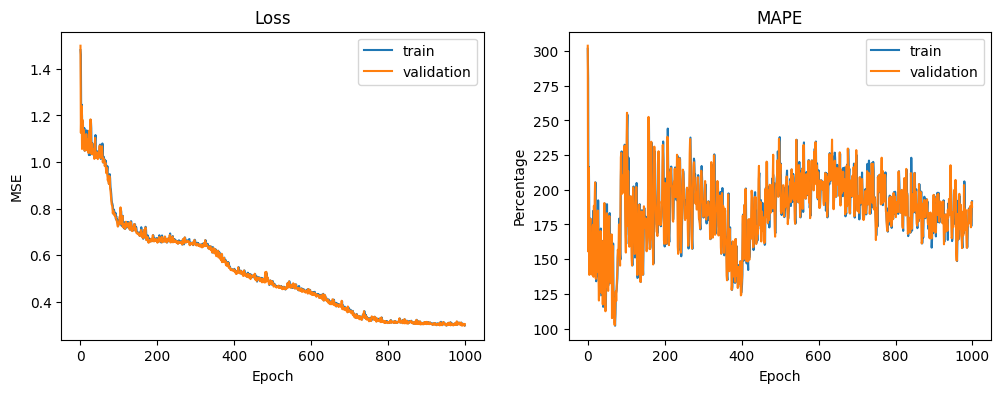

In [35]:

# plot the loss and mape for train and validation sets
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mape'], label='train')
plt.plot(history.history['val_mape'], label='validation')
plt.title('MAPE')
plt.xlabel('Epoch')
plt.ylabel('Percentage')
plt.legend()

plt.show()

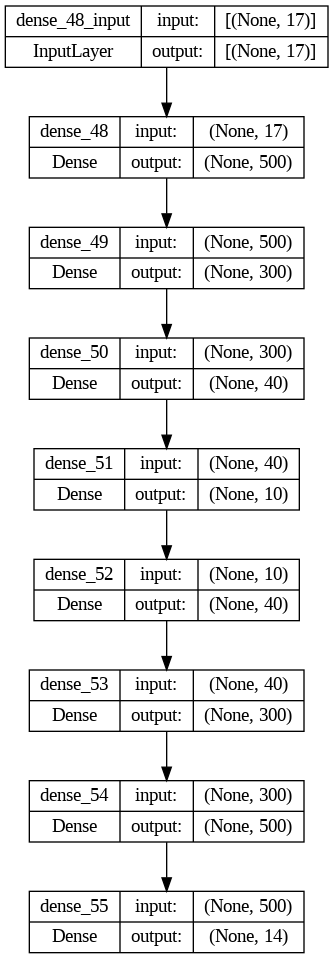

In [37]:
# plot and save your model
import tensorflow as tf
img_file = 'model.png'
tf.keras.utils.plot_model(model, to_file=img_file, show_shapes=True, show_layer_names=True)

1/1 [==============================] - 0s 46ms/step
[[ 6.9572225  9.645982  10.865172  12.531779  10.770427  10.269085
   5.650879   7.1631804  4.0712185 17.54255   13.452743  10.649457
   4.3957844  3.1788335]]


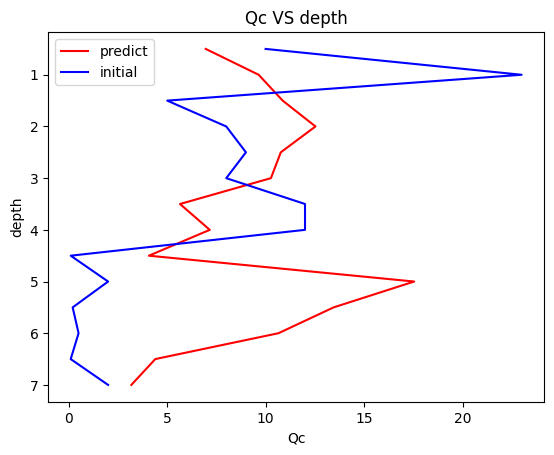

In [38]:
#validation for prediction
x_predictn=np.zeros((1,17))
x_predictn[0,:]=[10,23,5,8,9,8,12,12,0.1,2,0.2,0.5,0.1,2,50,18,0.5]
X_predict = sc.transform(x_predictn)

#set up calculation matrix

y=model.predict(X_predict)
y=sc_y.inverse_transform(y)
print(y)
#plot

import matplotlib.pyplot as plt

# Define the x-axis and corresponding y-axis values as lists

ydist=[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7]


# Plot them on canvas using plt.plot() function
plt.plot(y[0,:], ydist,color='red',label='predict')
plt.plot(x_predictn[0,0:14], ydist,color='blue',label='initial')
plt.legend()


# Give a name to x-axis and y-axis using plt.xlabel() and plt.ylabel() functions
plt.xlabel("Qc")
plt.ylabel("depth")

# Give a title to your plot using plt.title() function
plt.title("Qc VS depth")
# Get the current axes instance
ax = plt.gca()

# Invert the y-axis
ax.invert_yaxis()

# Finally, to view your plot, we use plt.show() function
plt.show()

In [39]:
def mape(actual, pred):
  return np.mean(np.ma.masked_invalid(np.abs((actual - pred) / actual))) * 100
mape_cal=mape(y_test, y_pred)
print('mape =',mape_cal)

mape = 187.8467578262603


In [ ]:
a=np.abs((y_test - y_pred) / y_test) * 100
c = np.mean(a[np.isfinite(a)])
print(c)

79.50610087873683


<ipython-input-62-c0683a0109a6>:1: RuntimeWarning: divide by zero encountered in true_divide
  a=np.abs((y_test - y_pred) / y_test) * 100


In [48]:
#Conv 1D
import numpy as np
import pandas as pd

# Import libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd



df = pd.read_excel('/content/drive/MyDrive/RIC/Trial2R1.xlsx')
data=np.array(df)
X=data[:,1:18]
Y=data[:,20:34]

# Load and preprocess data
#base model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)
sc = StandardScaler()
sc_y=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_train=sc_y.fit_transform(y_train)
y_test=sc_y.transform(y_test)

# Get time series data
data=X
#data_f=df_feature.values
#y=np.asarray(df_y)
#y=np.reshape(y,(y.shape[1],1))
data=np.reshape(data, (X.shape[0],X.shape[1],1))
# Create array data
#array_data = np.zeros((num_samples, data.shape[1],1))
#array_data[:,:,0]=data #add time step
#add feature
#for m in range(0,array_data.shape[0]): #add sample

 # for n in range(0,data_f.shape[0]): #add feature
    #array_data[m,:,n+1]=data_f[n,m]


  #array_data[0,:,1]=data_f[0,0]
  #array_data[0,:,2]=data_f[0,1]

#array_data[1,:,1]=data_f[1,0]
y=Y

In [49]:
X_test.shape

(3, 17)

In [50]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import KFold # Import KFold class
from sklearn.metrics import mean_absolute_percentage_error # Import MAPE function
from keras.layers import MaxPooling1D

'''# Define hyperparameters
n_steps = 100 # Number of time steps per sample
n_features = 3 # Number of features per time step such as pile length or diameter and soil data '''
n_filters = 32 # Number of filters in the convolutional layer
kernel_size = 5 # Size of the convolutional kernel

n_output = 1
# Generate some dummy data
#X = np.random.randn(100, n_steps, n_features) # 100 samples of 100 time steps with 1 feature each
X=data
#y = np.random.randn(num_samples, n_output) # 100 labels of 1 output unit each

# Define the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv1D(filters=n_filters, kernel_size=kernel_size, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model.add(tf.keras.layers.Conv1D(filters=n_filters, kernel_size=kernel_size, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(y.shape[1]))

# Compile the model
model.compile(optimizer='adam', loss='mse',metrics=['mape'])

#Train model
history = model.fit(X_train, y_train, batch_size=20, epochs=1000, validation_data=(X_test, y_test))


Epoch 1/1000
2/2 [==============================] - 1s 214ms/step - loss: 1.0812 - mape: 148.6010 - val_loss: 0.7926 - val_mape: 96.7945
Epoch 2/1000
2/2 [==============================] - 0s 35ms/step - loss: 1.0069 - mape: 130.6898 - val_loss: 0.7902 - val_mape: 97.9095
Epoch 3/1000
2/2 [==============================] - 0s 33ms/step - loss: 0.9514 - mape: 117.5202 - val_loss: 0.7852 - val_mape: 99.9210
Epoch 4/1000
2/2 [==============================] - 0s 39ms/step - loss: 0.8997 - mape: 105.0688 - val_loss: 0.7765 - val_mape: 103.1943
Epoch 5/1000
2/2 [==============================] - 0s 34ms/step - loss: 0.8692 - mape: 102.4020 - val_loss: 0.7690 - val_mape: 106.2320
Epoch 6/1000
2/2 [==============================] - 0s 35ms/step - loss: 0.8443 - mape: 107.3326 - val_loss: 0.7629 - val_mape: 108.1477
Epoch 7/1000
2/2 [==============================] - 0s 39ms/step - loss: 0.8185 - mape: 112.7502 - val_loss: 0.7552 - val_mape: 109.8431
Epoch 8/1000
2/2 [=========================

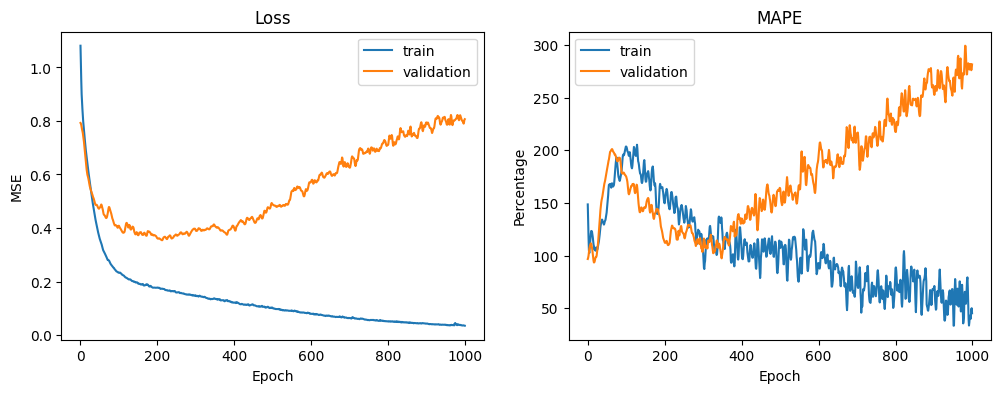

In [51]:

# plot the loss and mape for train and validation sets
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mape'], label='train')
plt.plot(history.history['val_mape'], label='validation')
plt.title('MAPE')
plt.xlabel('Epoch')
plt.ylabel('Percentage')
plt.legend()

plt.show()

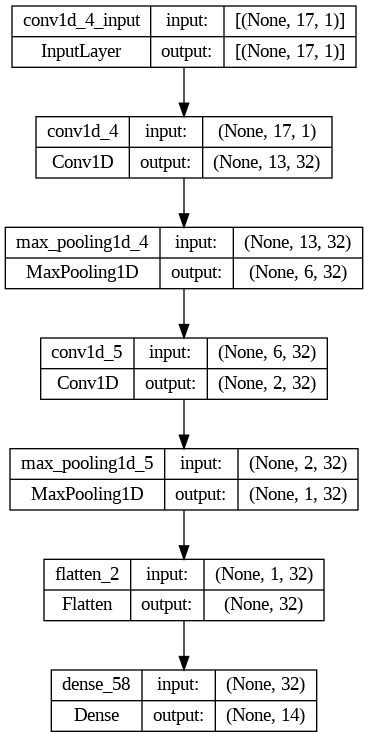

In [52]:
# plot and save your model
import tensorflow as tf
img_file = 'model.png'
tf.keras.utils.plot_model(model, to_file=img_file, show_shapes=True, show_layer_names=True)

In [ ]:
Convolution with K-fold model

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import KFold # Import KFold class
from sklearn.metrics import mean_absolute_percentage_error # Import MAPE function
from keras.layers import MaxPooling1D

'''# Define hyperparameters
n_steps = 100 # Number of time steps per sample
n_features = 3 # Number of features per time step such as pile length or diameter and soil data '''
n_filters = 32 # Number of filters in the convolutional layer
kernel_size = 5 # Size of the convolutional kernel

n_output = 1
# Generate some dummy data
#X = np.random.randn(100, n_steps, n_features) # 100 samples of 100 time steps with 1 feature each
X=data
#y = np.random.randn(num_samples, n_output) # 100 labels of 1 output unit each

# Define the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv1D(filters=n_filters, kernel_size=kernel_size, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model.add(tf.keras.layers.Conv1D(filters=n_filters, kernel_size=kernel_size, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(y.shape[1]))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Create a KFold object with 5 folds
kf = KFold(n_splits=5

# Loop over the folds
for train_index, test_index in kf.split(X):
    # Split the data into train and test sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model on the train set
    model.fit(X_train, y_train, epochs=1000, verbose =0)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate the MAPE on the test set
    mape = mean_absolute_percentage_error(y_test, y_pred)*100
    print(f'MAPE: {mape}')

SyntaxError: ignored

In [ ]:
def mape(actual, pred):
  return np.mean(np.abs((actual - pred) / actual)) * 100
mape(y_test, y_pred)


161.958824019205

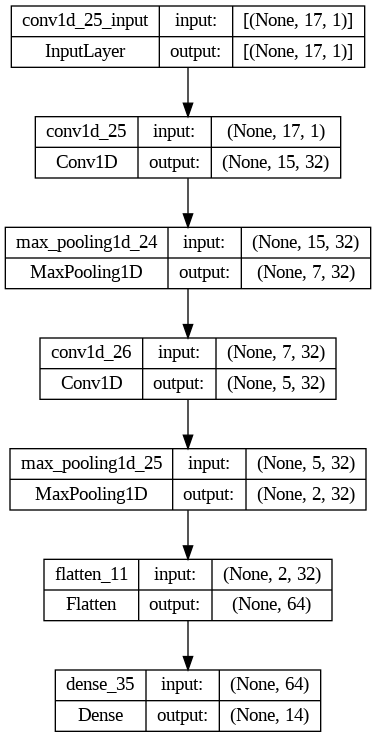

In [ ]:
# plot and save your model
import tensorflow as tf
img_file = 'model.png'
tf.keras.utils.plot_model(model, to_file=img_file, show_shapes=True, show_layer_names=True)

In [31]:
X.shape[1]

(26, 17)

Model for combination beween CNN and LSTM. The feature was sperte by Dense

In [67]:
df = pd.read_excel('/content/drive/MyDrive/RIC/Trial2R1.xlsx')
data=np.array(df)
X=data[:,1:18]
Y=data[:,20:34]
#split data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)
sc = StandardScaler()
sc_y=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train_f=X_train[:,14:17] #cut feature matrix
X_train=X_train[:,:14]
X_test_f=X_test[:,14:17] #get feature
X_test=X_test[:,:14] #renove feture
X_train_LSTM=data_LSTM(X_train)
X_test_LSTM=data_LSTM(X_test)
y_train=sc_y.fit_transform(y_train)
y_test=sc_y.transform(y_test)

Model part

In [68]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv1D, Flatten, concatenate
from keras.layers import MaxPooling1D
from keras.layers import LSTM, Dense


def dens_model(dense_input_shape):
  # Create the dense model
  dense_input = Input(shape=dense_input_shape)
  dense_output = Dense(300, activation='sigmoid')(dense_input)
  dense_output = Dense(100, activation='sigmoid')(dense_output)
  dense_output = Dense(50, activation='linear')(dense_output)
  dense_model = Model(inputs=dense_input, outputs=dense_output)
  return dense_model

def feature_model(dense_input_shape):
  # Create the dense model
  dense_input = Input(shape=dense_input_shape)
  dense_output = Dense(50, activation='sigmoid')(dense_input)
  dense_output = Dense(20, activation='sigmoid')(dense_output)
  dense_output = Dense(5, activation='linear')(dense_output)
  dense_model = Model(inputs=dense_input, outputs=dense_output)
  return dense_model

def CNN_model(cnn_input_shape):
  # Create the CNN model
  cnn_input = Input(shape=cnn_input_shape)
  cnn_output = Conv1D(filters=32, kernel_size=3, activation='relu')(cnn_input)
  cnn_output= MaxPooling1D(pool_size=2)(cnn_output)
  cnn_output = Flatten()(cnn_output)
  cnn_output = Dense(50, activation='linear')(cnn_output)
  cnn_model = Model(inputs=cnn_input, outputs=cnn_output)
  return cnn_model


def LSTM_model(dense_input_shape):
  # Create the dense model
  # Use the function parameter as the input shape
  dense_input = Input(shape=dense_input_shape)
  dense_output = LSTM(300)(dense_input)

  dense_output = Dense(100, activation='sigmoid')(dense_output)
  dense_output = Dense(50, activation='linear')(dense_output)
  dense_model = Model(inputs=dense_input, outputs=dense_output)
  return dense_model


def combind_model(dense_model,cnn_model,y_train):
  combined_input_dense = dense_model.output
  combined_input_cnn = cnn_model.output
  combined_input_LSTM = LSTM_model.output
  combined_input = concatenate([combined_input_cnn,combined_input_dense])
  combined_output = Dense(y_train.shape[1], activation='linear')(combined_input)
  combined_model = Model(inputs=[cnn_model.input,dense_model.input], outputs=combined_output)
  return combined_model

def combind_model2(LSTM_model,cnn_model,feature_model,y_train):
  combined_input_LSTM = LSTM_model.output
  combined_input_cnn = cnn_model.output
  combined_input_feature=feature_model.output
  combined_input = concatenate([combined_input_LSTM,combined_input_cnn,combined_input_feature])
  combined_output = Dense(y_train.shape[1], activation='linear')(combined_input)
  combined_model = Model(inputs=[LSTM_model.input,cnn_model.input,feature_model.input], outputs=combined_output)
  return combined_model

# Compile and summarize the combined model
#Main program

dense_input_shape = (X_train.shape[1])
cnn_input_shape = (X_train_LSTM.shape[1],1)
LSTM_input_shape=(X_train_LSTM.shape[1],1)
Feature_input_shape=(X_train_f.shape[1])
model_dense=dens_model(dense_input_shape)
model_cnn=CNN_model(cnn_input_shape)
model_lstm= LSTM_model(LSTM_input_shape)
model_feature=feature_model(Feature_input_shape)
model_combind=combind_model2(model_lstm,model_cnn,model_feature,y_train)
model_combind.compile(optimizer='adam', loss='mse', metrics=['mape'])
model_combind.summary()
model_combind.fit([X_train_LSTM, X_train_LSTM,X_train_f], y_train, epochs=2000, batch_size=20,validation_data=([X_test_LSTM,X_test_LSTM,X_test_f], y_test))

Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 14, 1)]      0           []                               
                                                                                                  
 input_11 (InputLayer)          [(None, 14, 1)]      0           []                               
                                                                                                  
 conv1d_8 (Conv1D)              (None, 12, 32)       128         ['input_10[0][0]']               
                                                                                                  
 input_12 (InputLayer)          [(None, 3)]          0           []                               
                                                                                           

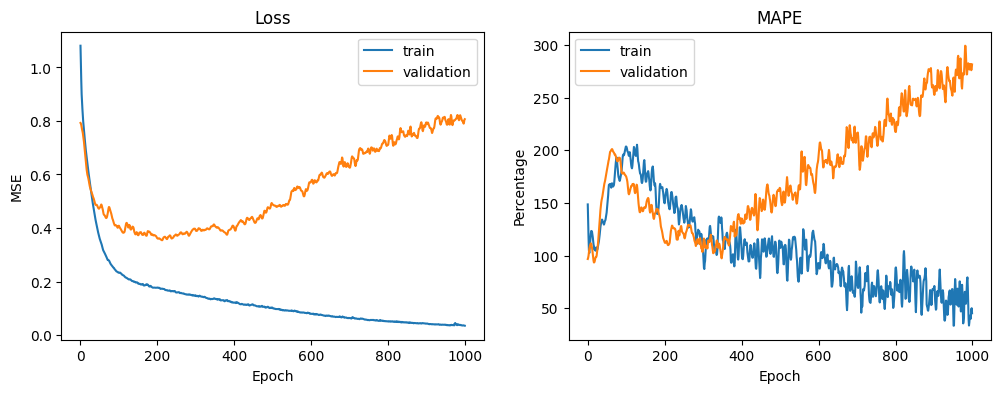

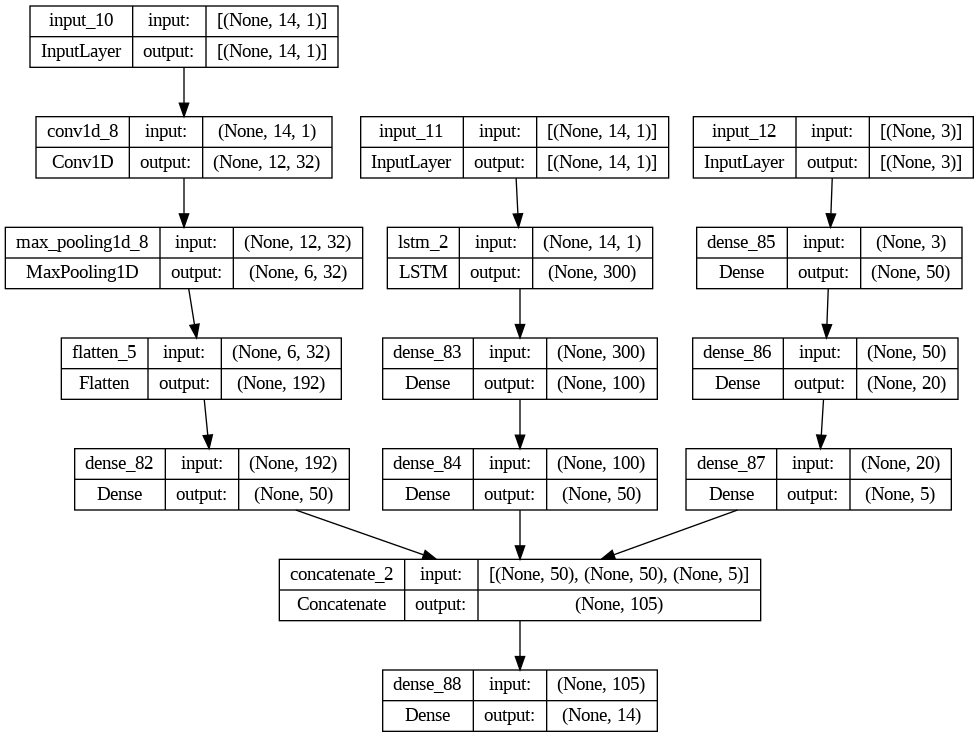

In [69]:
# plot the loss and mape for train and validation sets
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mape'], label='train')
plt.plot(history.history['val_mape'], label='validation')
plt.title('MAPE')
plt.xlabel('Epoch')
plt.ylabel('Percentage')
plt.legend()

plt.show()
# plot and save your model
import tensorflow as tf
img_file = 'model.png'
tf.keras.utils.plot_model(model_combind, to_file=img_file, show_shapes=True, show_layer_names=True)

In [64]:
#combind 2 model
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv1D, Flatten, concatenate
from keras.layers import MaxPooling1D
from keras.layers import LSTM, Dense


def dens_model(dense_input_shape):
  # Create the dense model
  dense_input = Input(shape=dense_input_shape)
  dense_output = Dense(300, activation='sigmoid')(dense_input)
  dense_output = Dense(100, activation='sigmoid')(dense_output)
  dense_output = Dense(50, activation='linear')(dense_output)
  dense_model = Model(inputs=dense_input, outputs=dense_output)
  return dense_model

def feature_model(dense_input_shape):
  # Create the dense model
  dense_input = Input(shape=dense_input_shape)
  dense_output = Dense(50, activation='sigmoid')(dense_input)
  dense_output = Dense(20, activation='sigmoid')(dense_output)
  dense_output = Dense(5, activation='linear')(dense_output)
  dense_model = Model(inputs=dense_input, outputs=dense_output)
  return dense_model

def CNN_model(cnn_input_shape):
  # Create the CNN model
  cnn_input = Input(shape=cnn_input_shape)
  cnn_output = Conv1D(filters=32, kernel_size=3, activation='relu')(cnn_input)
  cnn_output= MaxPooling1D(pool_size=2)(cnn_output)
  cnn_output = Flatten()(cnn_output)
  cnn_output = Dense(50, activation='linear')(cnn_output)
  cnn_model = Model(inputs=cnn_input, outputs=cnn_output)
  return cnn_model


def LSTM_model(dense_input_shape):
  # Create the dense model
  # Use the function parameter as the input shape
  dense_input = Input(shape=dense_input_shape)
  dense_output = LSTM(300)(dense_input)

  dense_output = Dense(100, activation='sigmoid')(dense_output)
  dense_output = Dense(50, activation='linear')(dense_output)
  dense_model = Model(inputs=dense_input, outputs=dense_output)
  return dense_model


def combind_model(dense_model,cnn_model,y_train):
  combined_input_dense = dense_model.output
  combined_input_cnn = cnn_model.output
  combined_input_LSTM = LSTM_model.output
  combined_input = concatenate([combined_input_cnn,combined_input_dense])
  combined_output = Dense(y_train.shape[1], activation='linear')(combined_input)
  combined_model = Model(inputs=[cnn_model.input,dense_model.input], outputs=combined_output)
  return combined_model

def combind_model2(LSTM_model,cnn_model,y_train):
  combined_input_LSTM = LSTM_model.output
  combined_input_cnn = cnn_model.output
  combined_input = concatenate([combined_input_LSTM,combined_input_cnn])
  combined_output = Dense(y_train.shape[1], activation='linear')(combined_input)
  combined_model = Model(inputs=[LSTM_model.input,cnn_model.input], outputs=combined_output)
  return combined_model

# Compile and summarize the combined model
#Main program

dense_input_shape = (X_train.shape[1])
cnn_input_shape = (X_train_LSTM.shape[1],1)
LSTM_input_shape=(X_train_LSTM.shape[1],1)
Feature_input_shape=(X_train_f.shape[1])
model_dense=dens_model(dense_input_shape)
model_cnn=CNN_model(cnn_input_shape)
model_lstm= LSTM_model(LSTM_input_shape)
model_feature=feature_model(Feature_input_shape)
model_combind=combind_model2(model_lstm,model_cnn,y_train)
model_combind.compile(optimizer='adam', loss='mse', metrics=['mape'])
model_combind.summary()
hist=model_combind.fit([X_train_LSTM, X_train_LSTM], y_train, epochs=2000, batch_size=20,validation_data=([X_test_LSTM,X_test_LSTM], y_test))


Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 17, 1)]      0           []                               
                                                                                                  
 input_7 (InputLayer)           [(None, 17, 1)]      0           []                               
                                                                                                  
 conv1d_7 (Conv1D)              (None, 15, 32)       128         ['input_6[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (None, 300)          362400      ['input_7[0][0]']                
                                                                                            

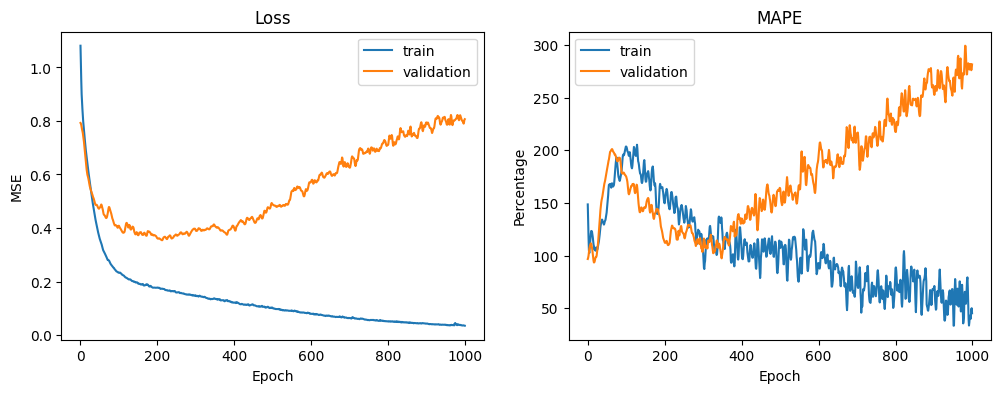

In [65]:
# plot the loss and mape for train and validation sets
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mape'], label='train')
plt.plot(history.history['val_mape'], label='validation')
plt.title('MAPE')
plt.xlabel('Epoch')
plt.ylabel('Percentage')
plt.legend()

plt.show()

1/1 [==============================] - 1s 1s/step


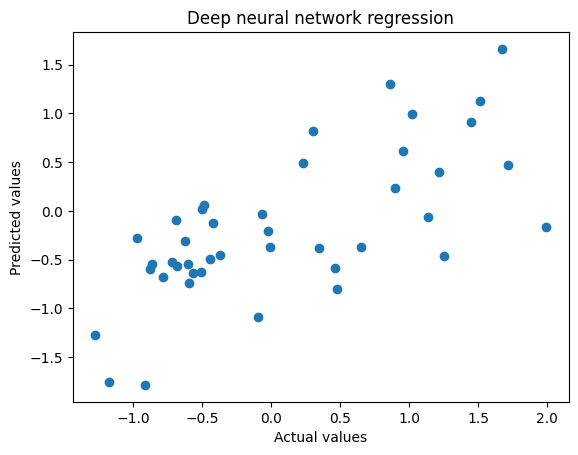

In [57]:
# Evaluate model
y_pred = model_combind.predict([X_test_LSTM,X_test_LSTM,X_test_f])
#print("Mean squared error:", mse)
'''
def mape(actual, pred):
  a=np.abs((actual - pred) / actual) * 100
  c = np.mean(a[np.isfinite(a)])
  return c
mape_cal=mape(y_test, y_pred)
print('mape =',mape_cal)
'''
# Plot results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Deep neural network regression")
plt.show()

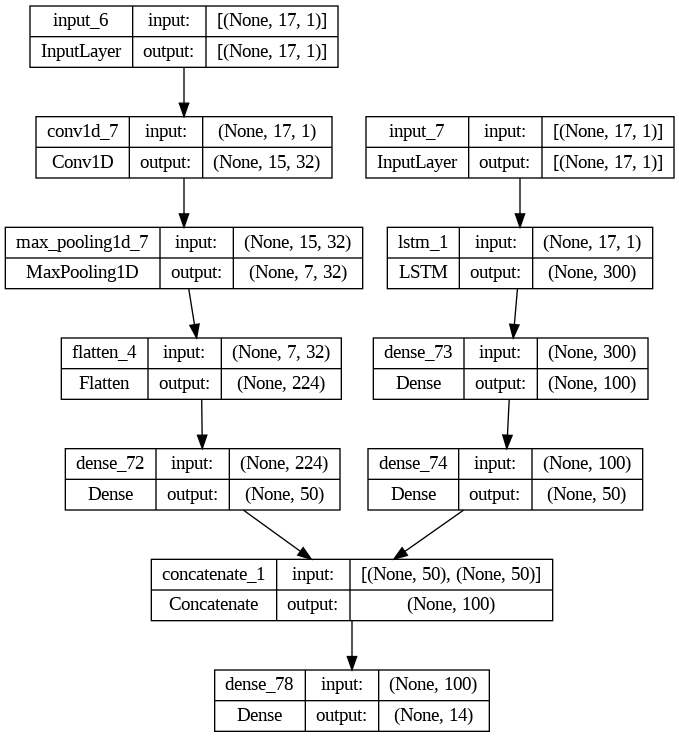

In [66]:
# plot and save your model
import tensorflow as tf
img_file = 'model.png'
tf.keras.utils.plot_model(model_combind, to_file=img_file, show_shapes=True, show_layer_names=True)

In [ ]:
# Create the CNN model
cnn_input_shape = (15, 15,1)

cnn_input = Input(shape=cnn_input_shape)
cnn_output = Conv1D(filters=32, kernel_size=3, activation='relu')(cnn_input)
cnn_output = Flatten()(cnn_output)
cnn_output = Dense(14, activation='relu')(cnn_output)

cnn_model = Model(inputs=cnn_input, outputs=cnn_output)
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "model_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_57 (InputLayer)       [(None, 15, 15, 1)]       0         
                                                                 
 conv1d_69 (Conv1D)          (None, 15, 13, 32)        128       
                                                                 
 flatten_42 (Flatten)        (None, 6240)              0         
                                                                 
 dense_122 (Dense)           (None, 14)                87374     
                                                                 
Total params: 87,502
Trainable params: 87,502
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cnn_input_shape = (15, 15,1)

# Define the input shapes
dense_input_shape = (15)
cnn_input_shape = (15, 15,1)

# Create the dense model
dense_input = Input(shape=dense_input_shape)
dense_output = Dense(14, activation='relu')(dense_input)
dense_model = Model(inputs=dense_input, outputs=dense_output)
dense_model.summary()


Model: "model_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_61 (InputLayer)       [(None, 15)]              0         
                                                                 
 dense_126 (Dense)           (None, 14)                224       
                                                                 
Total params: 224
Trainable params: 224
Non-trainable params: 0
_________________________________________________________________
